In [2]:
import sys
sys.path.append('D:/source/repos')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import datetime as dt
import scipy.stats as ss
from Trading.JLUtilities.DailyTrading import *

In [3]:
df_covid = pd.read_csv('https://covidtracking.com/api/v1/us/daily.csv')[['date', 'positive']]
df_covid['date'] = pd.to_datetime(df_covid['date'].astype(str), format='%Y%m%d')
df_covid.head()

,date,positive
0,2020-06-28,2540983
1,2020-06-27,2498822
2,2020-06-26,2455351
3,2020-06-25,2410978
4,2020-06-24,2371917


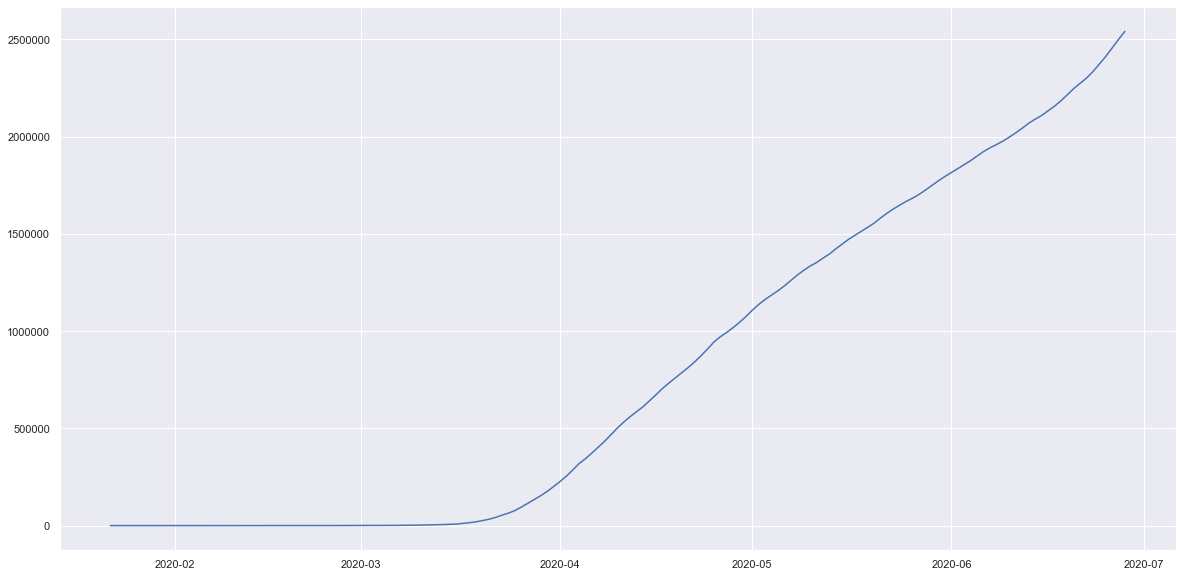

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(df_covid.date, df_covid.positive);

In [5]:
start = df_covid.iloc[-1]['date']
end = df_covid.iloc[0]['date']

ticker = 'VOO'
data = yfs.get_data(ticker, start_date=start, end_date=end)

In [5]:
df_covid.index = df_covid.date
df_covid['sp500'] = data['close']

df_covid = df_covid[(df_covid.index> '2020-03-20') & (df_covid.index <= '2020-06-25')]
df_covid = df_covid.dropna()

r = ss.pearsonr(df_covid['positive'], df_covid['sp500'])[0]
round(r, 2)

0.93

[]

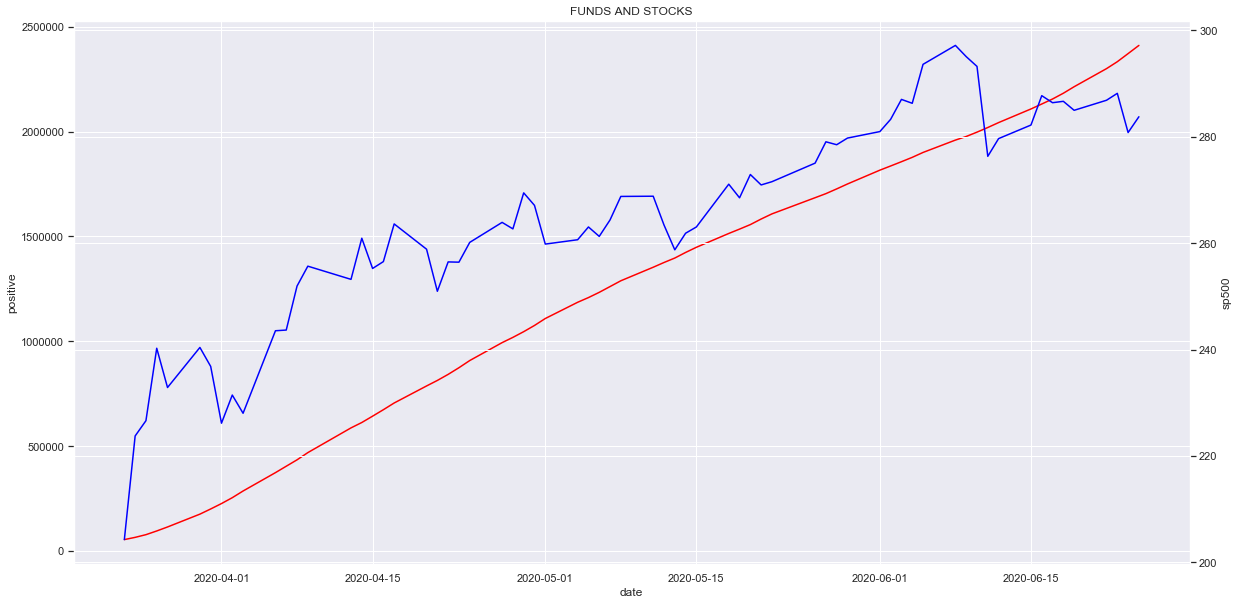

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))
sb.lineplot(x= df_covid['date'], y=df_covid['positive'].astype(np.float), color="red")
ax2 = ax.twinx()
sb.lineplot(x= df_covid['date'], y=df_covid['sp500'].astype(np.float), color="blue").set_title('FUNDS AND STOCKS')
plt.plot(figsize=(16, 6))